In [250]:
import yfinance as yf

In [251]:
ticker = '^GSPC'

sp500 = yf.Ticker(ticker)

In [252]:
sp500 = sp500.history(period='20y')

In [253]:
import matplotlib.pyplot as plt

plt.plot(sp500['Close'])

In [254]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500['Target'] = sp500['Tomorrow'] > sp500['Close']

In [255]:
plt.clf()

plt.plot(sp500['Tomorrow'])

In [256]:
sp500 = sp500.dropna()

del sp500['Volume']

In [257]:
timesteps = 10

features = sp500.shape[1] - 1

y = sp500.drop(columns="Target").values

num_samples = y.shape[0] // timesteps

y = y[:num_samples*timesteps]

y = y.reshape((num_samples, timesteps, features))

In [258]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

seq = Sequential()

seq.add(Input(shape=(timesteps, features)))
seq.add(LSTM(50, return_sequences=True))
seq.add(LSTM(50, return_sequences=True))
seq.add(LSTM(50))
seq.add(Dense(1, activation='sigmoid'))

seq.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [259]:
seq.fit(y, sp500['Target'].values[:num_samples*timesteps].reshape((num_samples, timesteps, 1)), epochs=100, batch_size=128, validation_split=0.05)

In [327]:
import yfinance as yf
ticker = '^GSPC'
sp500 = yf.Ticker(ticker)
sp500 = sp500.history(period='20y')


In [328]:
sp500 = sp500.reset_index()['Close']

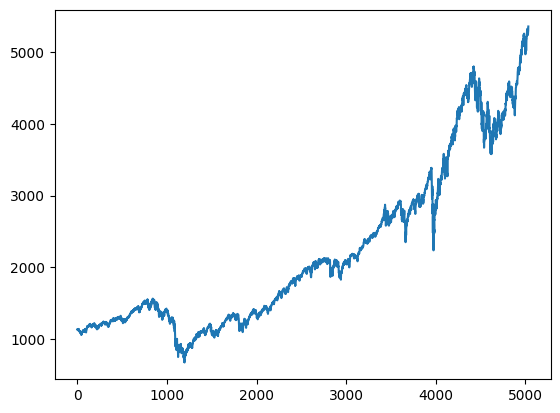

In [329]:
import matplotlib.pyplot as plt
plt.plot(sp500)

In [330]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()

sp500 = scaler.fit_transform(np.array(sp500).reshape(-1, 1))

In [331]:
sp500.shape

(5034, 1)

In [332]:
train_size = int(len(sp500) * 0.8)
test_size = len(sp500) - train_size

train, test = sp500[0:train_size,:], sp500[train_size:len(sp500),:]

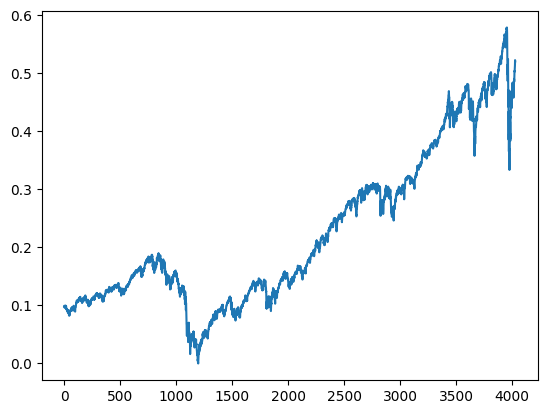

In [333]:
plt.clf()
plt.plot(train)

In [334]:
import numpy as np

In [335]:
def createDataSet(dataset, timesteps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-timesteps-1):
        a = dataset[i:(i+timesteps), 0]
        dataX.append(a)
        dataY.append(dataset[i + timesteps, 0])
    return np.array(dataX), np.array(dataY)

In [336]:
time_step=100
trainX, trainY = createDataSet(train, time_step)
testX, testY = createDataSet(test, time_step)

In [337]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

seq = Sequential()
seq.add(LSTM(50, recurrent_dropout=0.06, input_shape=(trainX.shape[1],1), return_sequences=True))
seq.add(LSTM(50, return_sequences=True))
seq.add(LSTM(50))
seq.add(Dense(1))


seq.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

/Users/himme/Downloads/git/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [338]:
seq.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_39 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [339]:
seq.fit(trainX, trainY, epochs=110, batch_size=64, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=10)])

Epoch 1/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 6.6982e-05 - loss: 0.0171
Epoch 2/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 2.3634e-04 - loss: 2.6391e-04
Epoch 3/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 2.4667e-04 - loss: 1.8960e-04
Epoch 4/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 2.2642e-04 - loss: 1.7330e-04
Epoch 5/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 1.8201e-04 - loss: 1.5196e-04
Epoch 6/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 3.0599e-04 - loss: 1.5237e-04
Epoch 7/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 1.2425e-04 - loss: 1.3034e-04
Epoch 8/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 3.8055e-05 - loss: 1.2645e-04
Epoch 9/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.0012 - loss: 1.2140e-04
Epoch 10/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 3.4986e-04 - loss: 1.3958e-04
Epoch 11/110
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 2.

In [340]:

testX.shape

(906, 100)

In [341]:
trainPredict = seq.predict(trainX)
testPredict = seq.predict(testX)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [342]:
from sklearn.metrics import mean_squared_error
import math

In [343]:
trainPredict.shape

(3926, 1)

In [344]:
trainPredict = scaler.inverse_transform(trainPredict)

In [345]:
testPredict = scaler.inverse_transform(testPredict)

In [346]:
print(math.sqrt(mean_squared_error(trainY, trainPredict[:,0])))
print(math.sqrt(mean_squared_error(testY, testPredict[:,0])))

1864.5426695161598
4344.877465384915


In [347]:
look = 100

trainPredictPlot = np.empty_like(sp500)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look:len(trainPredict)+look, :] = trainPredict

testPredictPlot = np.empty_like(sp500)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look*2)+1:len(sp500)-1, :] = testPredict


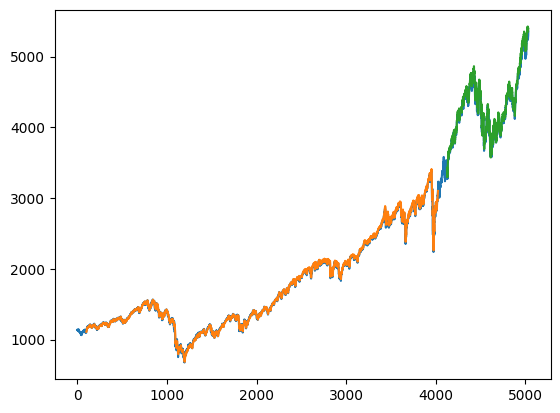

In [348]:
plt.plot(scaler.inverse_transform(sp500))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

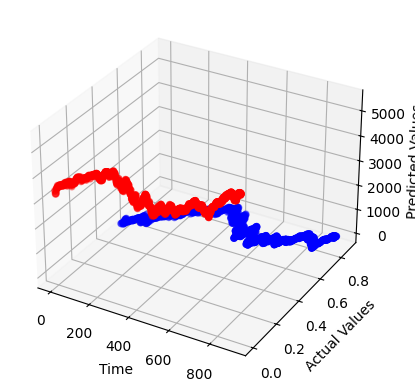

In [349]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

time = np.arange(testX.shape[0])

ax.scatter(time, testX[:,0], np.zeros_like(testX[:,0]), color='b')

ax.scatter(time, np.zeros_like(testPredict[:,0]), testPredict[:,0], color='r')

ax.set_xlabel('Time')
ax.set_ylabel('Actual Values')
ax.set_zlabel('Predicted Values')

plt.show()

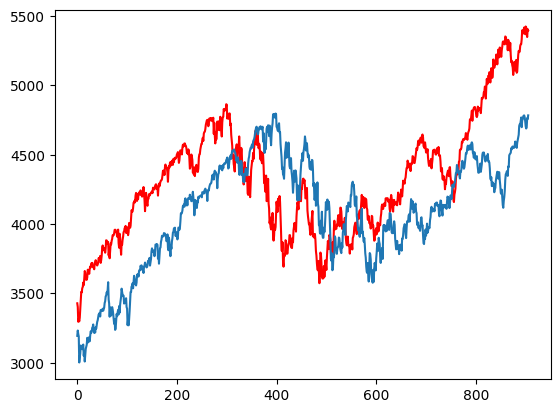

In [350]:
plt.clf()
plt.plot(testPredict, c='r')
plt.plot(scaler.inverse_transform(testX[:,0].reshape(-1, 1)))

In [351]:
import pickle as p

In [352]:
p.dump(scaler, open('vectorizers/scaler.pkl', 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'vectorizers/scaler.pkl'

In [ ]:
sp500 = yf.Ticker('^GSPC').history('20y')

In [ ]:
sp500